Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Goal:

Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations

In [450]:
##Import all the required libraries/Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


Import the dataset

In [451]:
df=pd.read_csv('day.csv')

In [452]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [453]:
df.shape

(730, 16)

In [454]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Check if any Null columns and % of null values in the columns of the dataset

In [455]:
df.isnull().mean()*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

No columns have Null values

Check how many nul values across the rows

In [456]:
df_null_columns = df.isnull().any(axis=1)
df_null_rows = df[df_null_columns]
print(df_null_rows)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


We dont see any null rows in the dataset

In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [458]:
df.value_counts()

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt 
1        01-01-2018  1       0   1     0        6        0           2           14.110847  18.18125  80.5833  10.749882  331     654         985     1
480      25-04-2019  2       1   4     0        3        1           1           19.543347  23.51585  42.7917  7.959064   655     5541        6196    1
482      27-04-2019  2       1   4     0        5        1           1           18.757500  22.63185  40.0833  23.291411  1014    5219        6233    1
483      28-04-2019  2       1   4     0        6        0           2           15.443347  18.87520  48.9583  8.708325   1120    3100        4220    1
484      29-04-2019  2       1   4     0        0        0           1           18.791653  22.50605  58.7083  7.832836   2229    4075        6304    1
                                                                                             

Reading the Dictionary content of the dataset

In [459]:
Dict=open('Dictionary.txt')
Dict_content=Dict.read()
print(Dict_content)
Dict.close()

Dataset characteristics
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
License

Based on the above descritpion seems like 4 Columns are reduandant and doesn't server any purpose in the dataset

In [460]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [461]:
num_cols=['temp', 'atemp', 'hum', 'windspeed','cnt']
cat_cols=['season','mnth','holiday', 'weekday','workingday','yr','weathersit']

In [462]:
sns.color_palette('blend:0.1,blue,0.9', as_cmap=True)
sns.set_style('white')

Univariate Analysis 

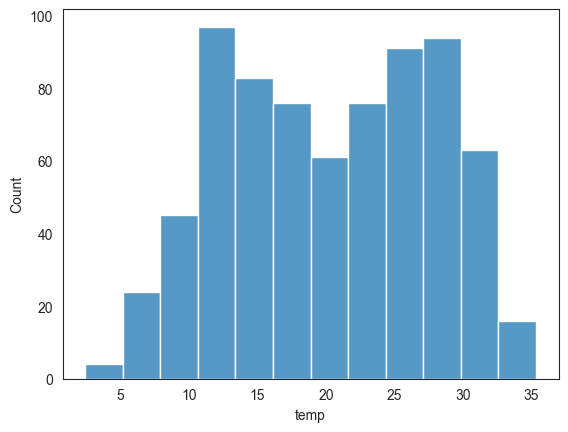

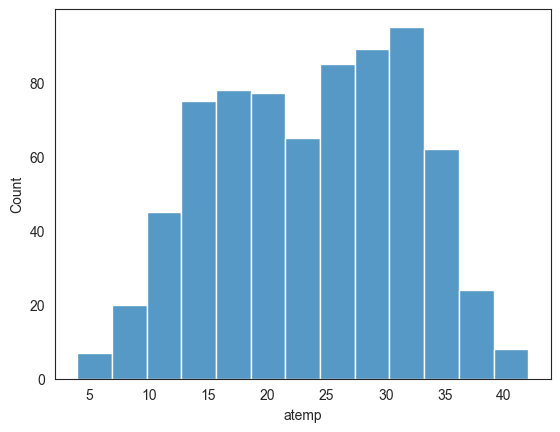

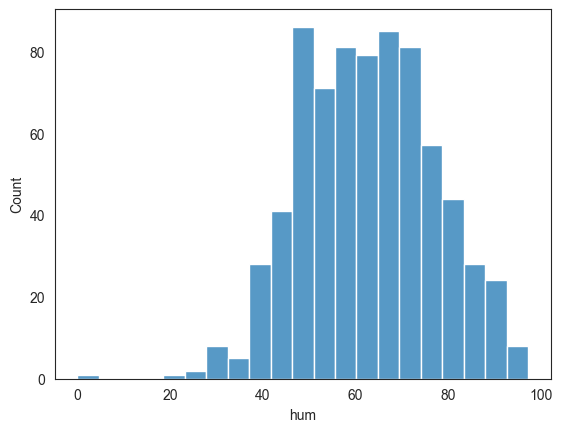

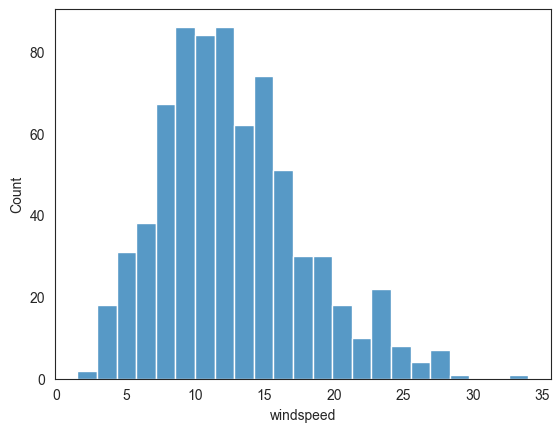

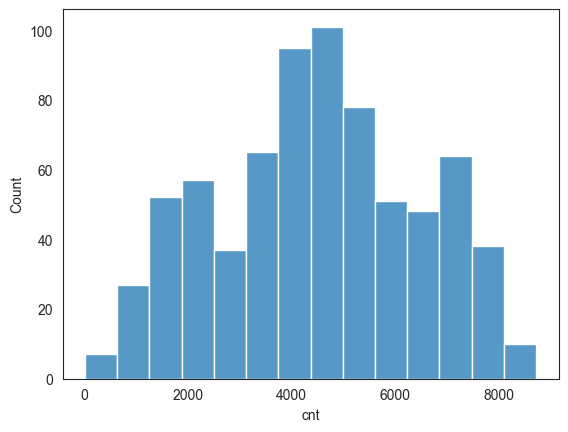

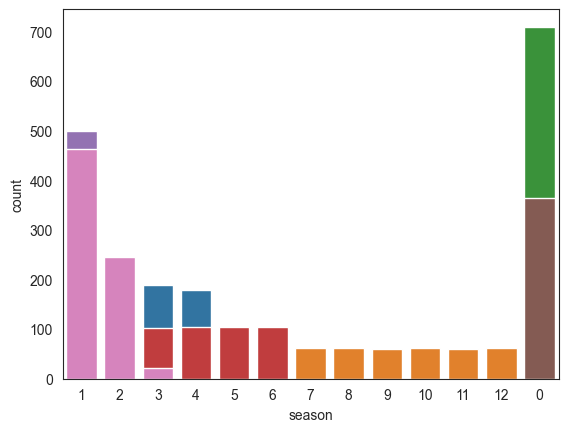

In [463]:
sns.color_palette('blend:0.1,blue,0.9', as_cmap=True)
sns.set_style('white')
for i in num_cols: 
    sns.histplot(x=df[i]) 
    plt.show() 
for i in cat_cols: 
    sns.countplot(x=df[i]) 


Bivariate Analysis 

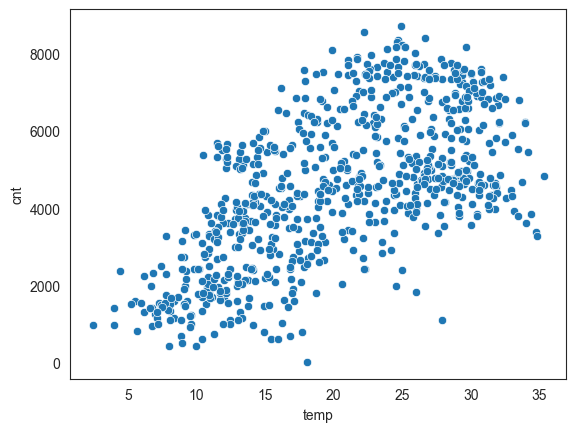

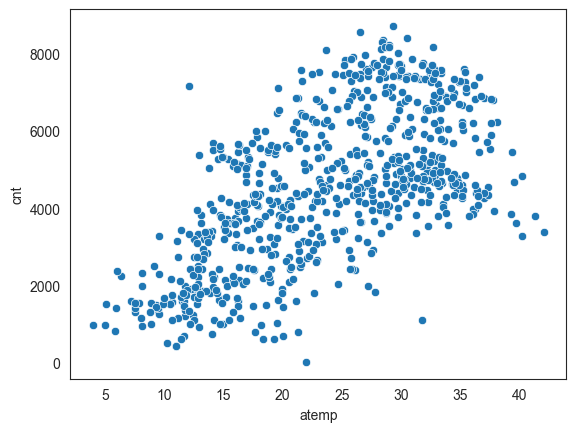

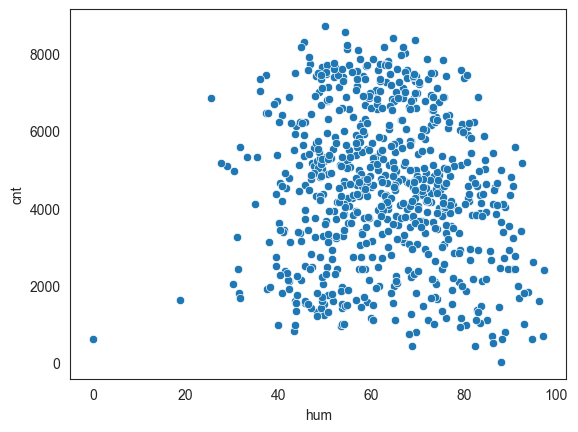

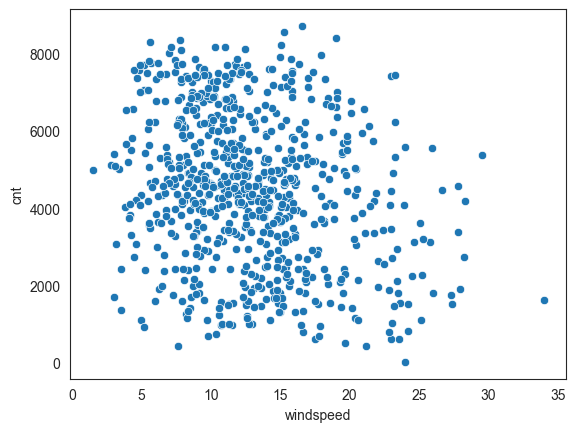

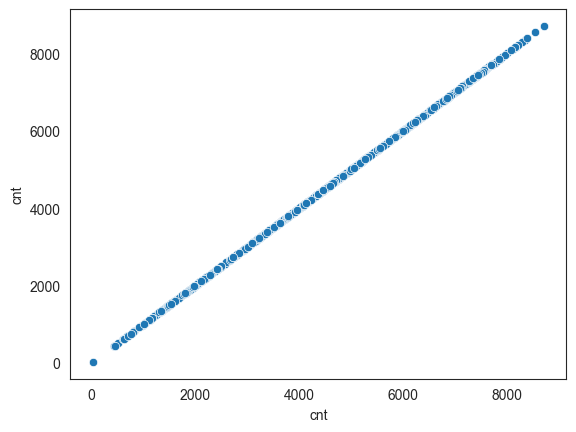

In [464]:
#sns.pairplot(df[num_cols]) 
#plt.show() f
for i in num_cols: 
    sns.scatterplot(x=df[i],y=df["cnt"],palette="Set8")
    plt.show() 

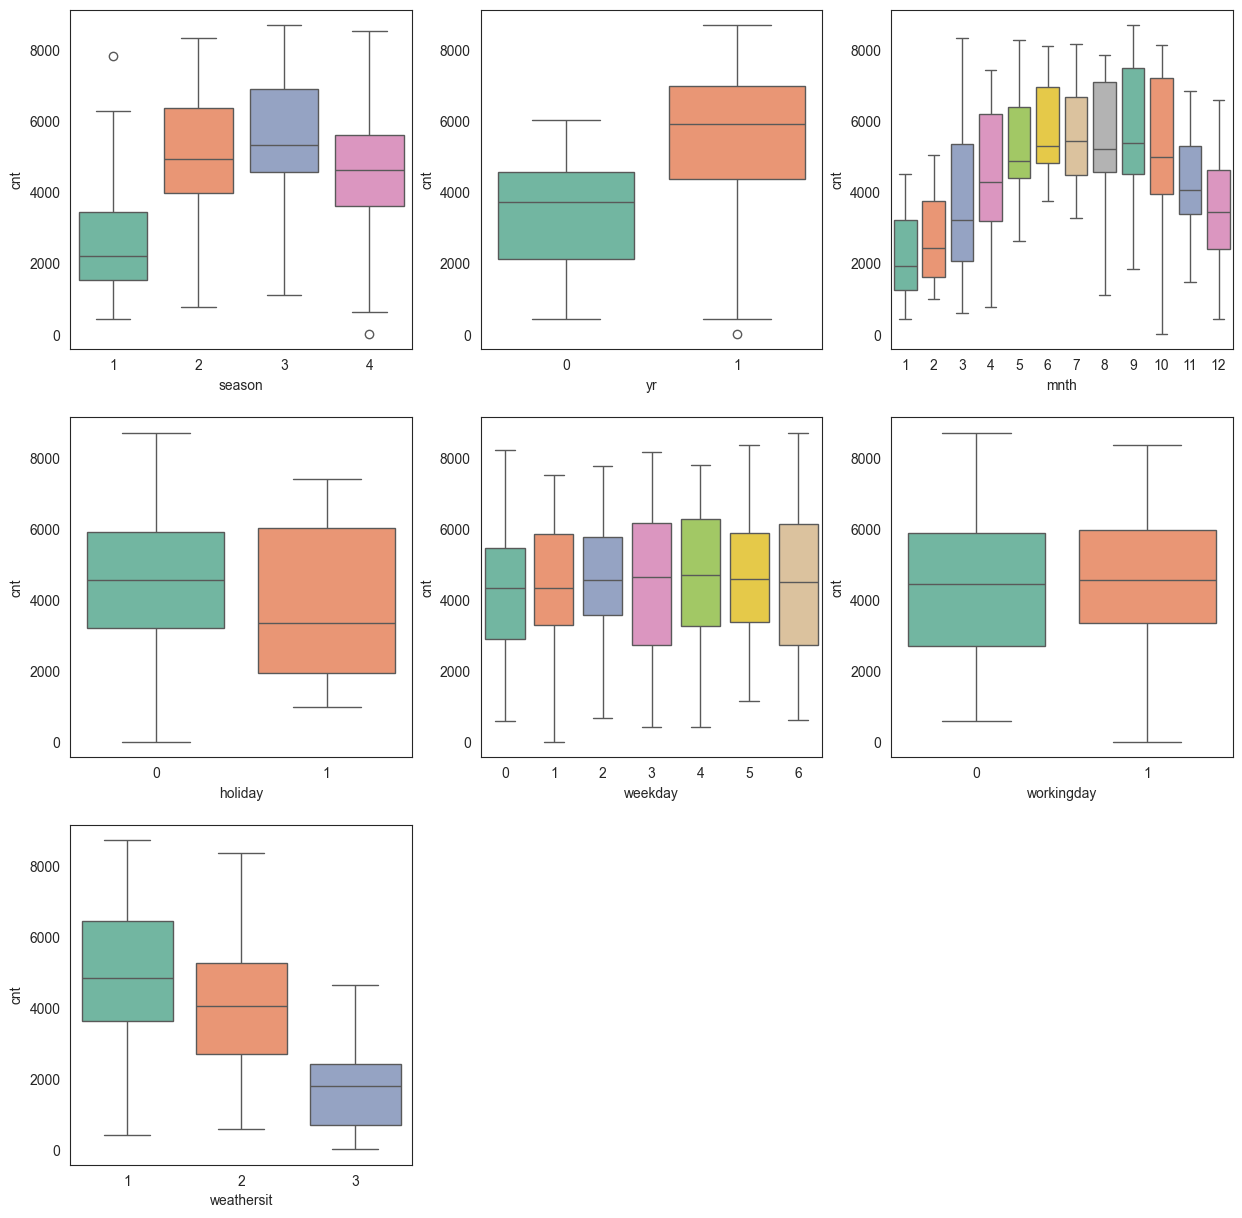

In [465]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt',palette="Set2")
plt.show()

Inference after Univariate and Bivariate Analyses
people rent Bikes when

1. Season: 3:fall has highest demand for rental bikes
2. Bike renting has increased in 2019 when compared to 2018, It indicated positive growth in buinsess in 2019 comapred to 2018.
3. Demand is continuously growing each month till June. September month has highest demand. After September, It decline as the climatic   condition geeting detirioarated
4. Bike renting is  observed making good business during weekdays/working days when compared to Weekends/Holidays. This indicates Its an good/convineient commute option for people to travel during workingdays
5. The demand of the biken rening is almost similar across all thw workingdays, 
6. Bike renting seems to be a popular option during the good climatic condition.
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.
8. Bikes are rented during moderate Winddpssed and low Humidity 

Multivariate Analysis 

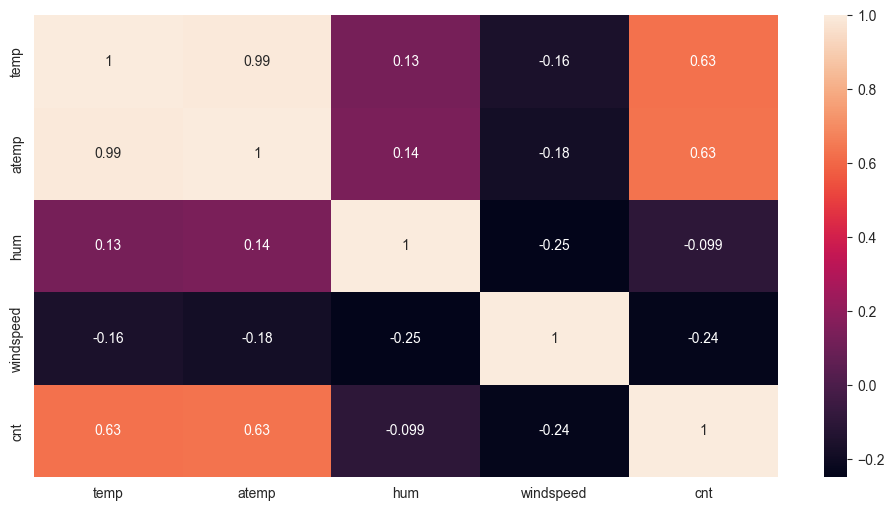

In [466]:
plt.figure(figsize=(12,6)) 
sns.heatmap(df[num_cols].corr(),annot=True) 
plt.show()

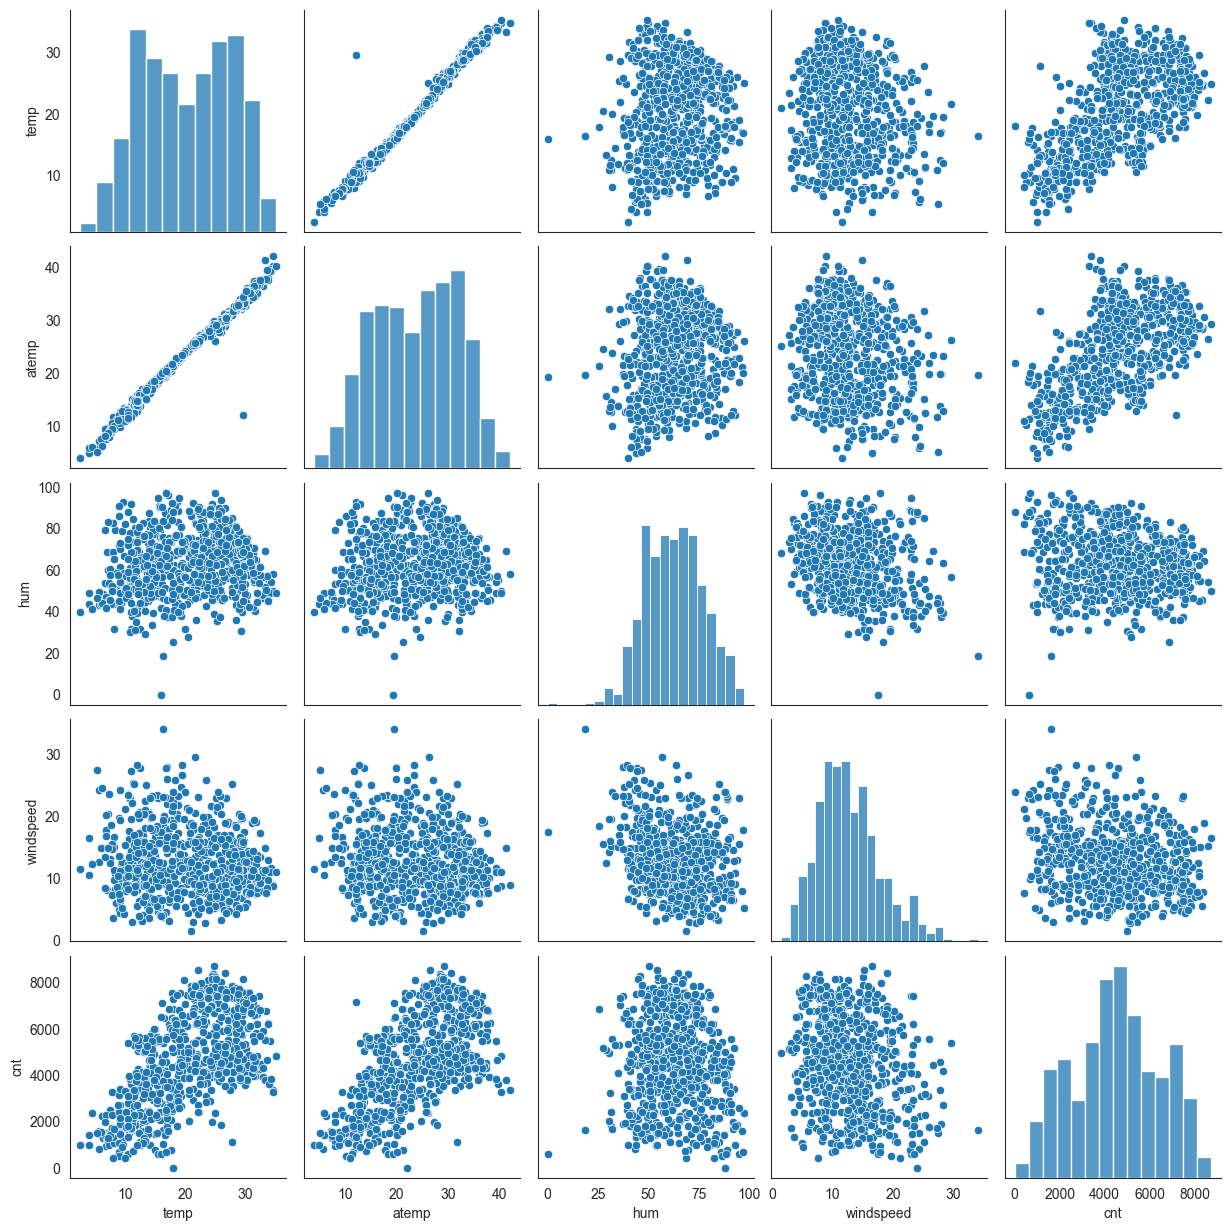

In [467]:
sns.pairplot(data=df[num_cols], palette="Set2")

Multivariate Analyses

1. Temprature and and atemp are highly correlated, We can drop one and Keep only one variable
2. Bike rental increases drastically on Sunny hot day
3. Bikes are rented during moderate Winddpssed and   low Humidity 

Dropping Columns
1. instant - Its just Index vlue of the Dataset
2. dteday - We have derived columns in terms of month,day and Year
3. casual & registered - Total cnt, arec combination of both casual and registred bike rentals. All 3 features will behave similar, We are
4. considering the cnt as dependent variable removing these 2 columns

Creating a new dataset df_new , thise doesnt contain the above mentioend columns

In [468]:
df_new=df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [469]:
df_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [470]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [471]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


<Axes: >

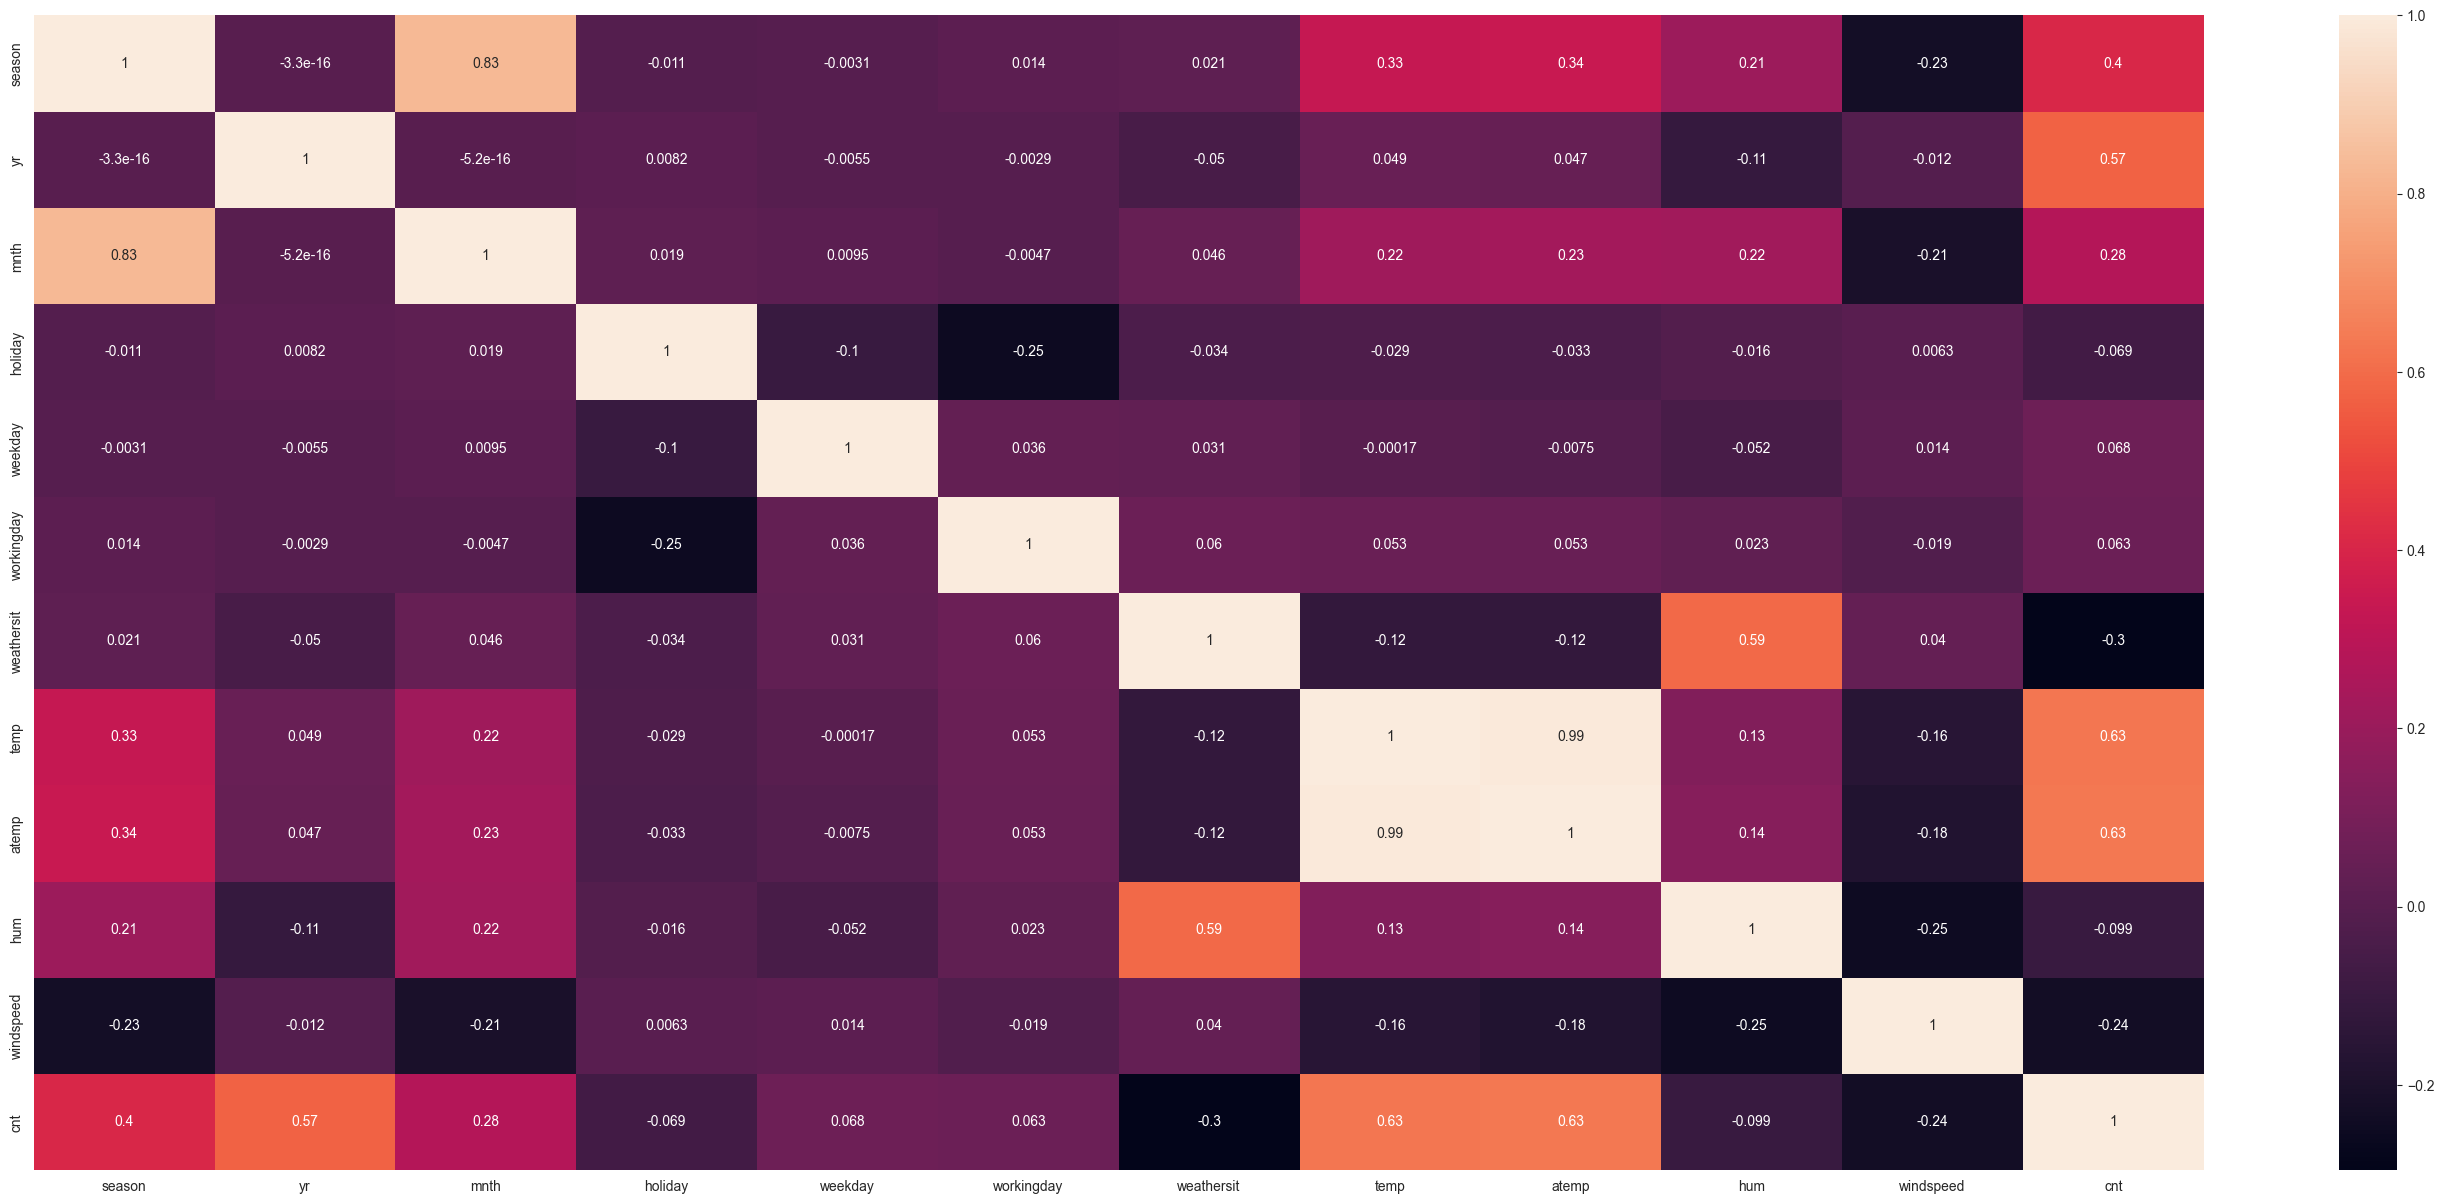

In [472]:
plt.figure(figsize=(35, 15))
sns.heatmap(df_new.corr(numeric_only=True),annot=True)

Checking for the outliers every independent variable  in the Dataset

In [473]:
X_outliers=df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'atemp', 'hum', 'windspeed']]

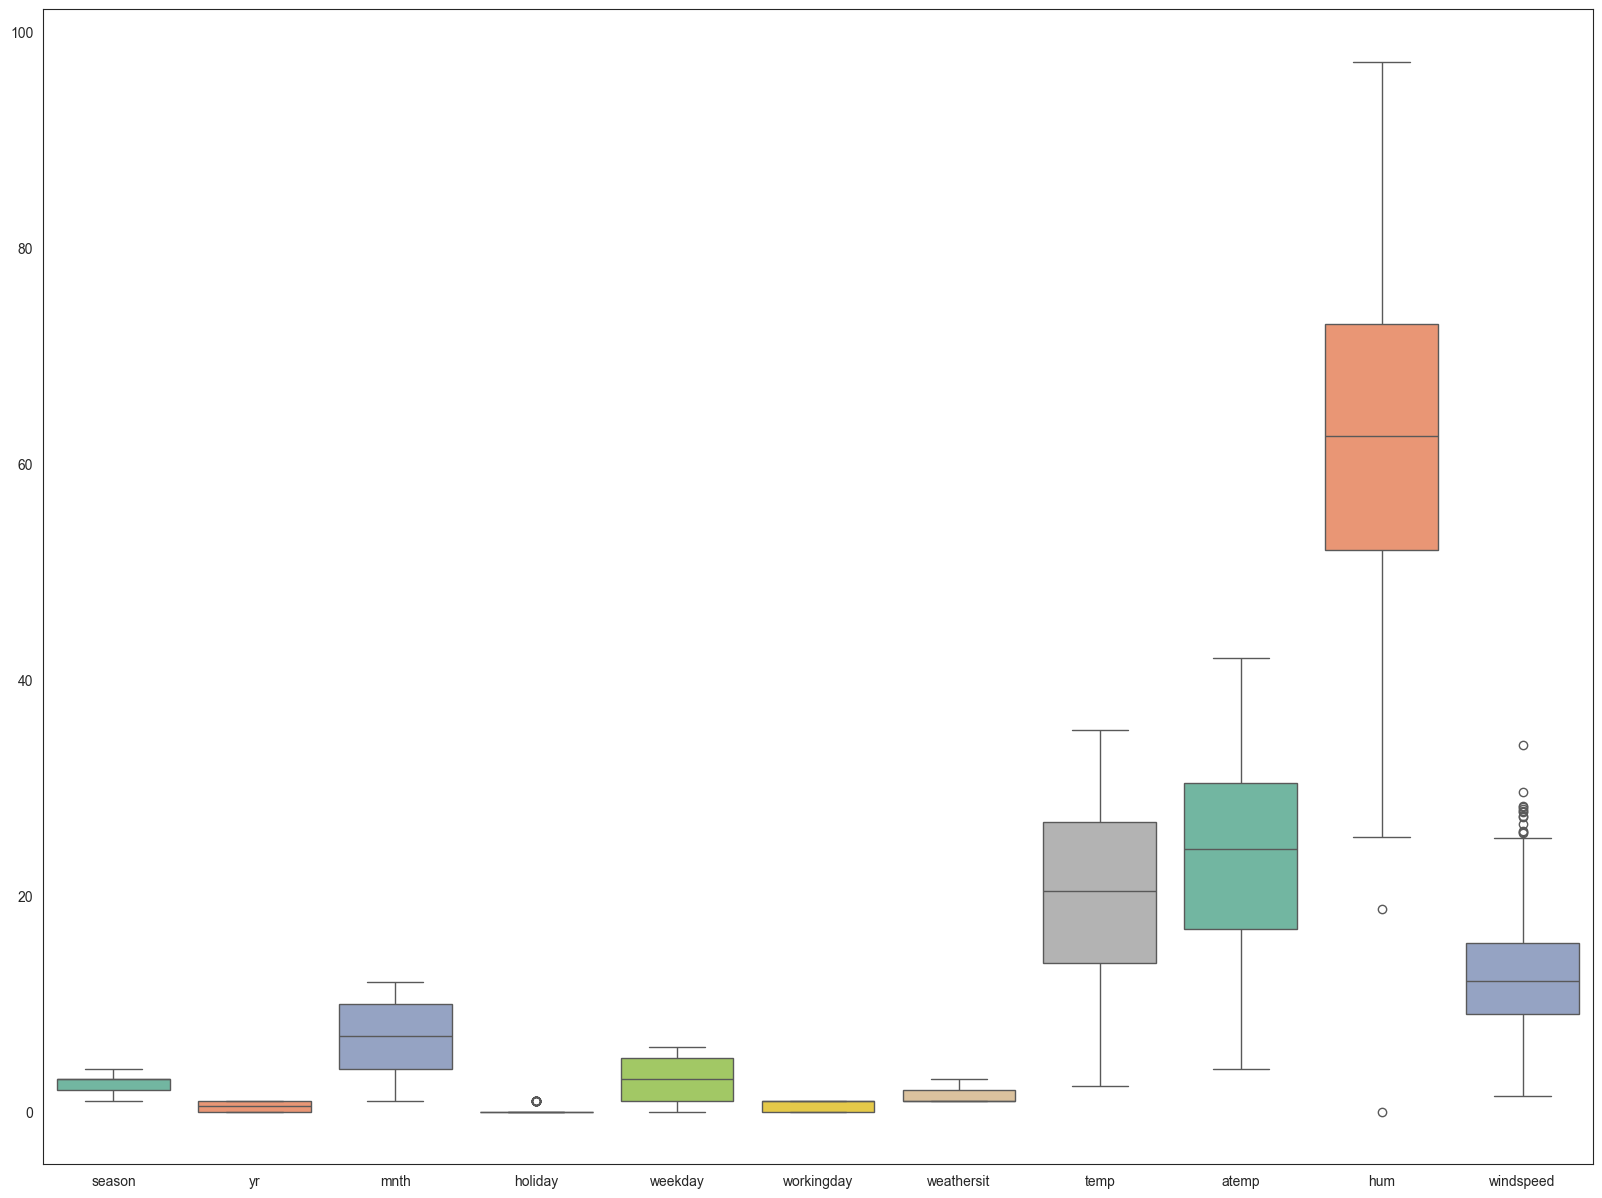

In [474]:
fig = plt.figure(figsize =(20, 15))
ax = sns.boxplot(data=X_outliers, orient="v", palette="Set2")
np.random.seed(10)


We can see Features doesnt contain any outliers

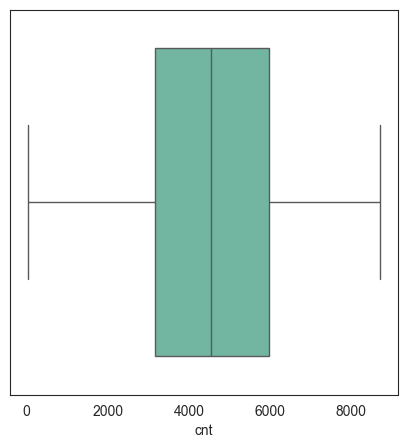

In [475]:
y_outliers=df_new['cnt']
fig = plt.figure(figsize =(5, 5))
ax = sns.boxplot(data=y_outliers, orient="h", palette="Set2")
np.random.seed(10)

We can see dependent  varibale also doesnt contain any outliers

Data Preparation

In [476]:
df_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

Convert the columns season,yr,mnth,holiday,weekday,workingday,weathersit
As yr,hoiday,workingday consists of only 2 possibalities (0 &1), excluding them in creating dummpy values for these columns

In [477]:
cat_columns=['season','mnth','weekday','weathersit']

In [478]:
df_new.select_dtypes(include='number')

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [479]:
df_new[['season','mnth','weekday','weathersit']].value_counts()

season  mnth  weekday  weathersit
1       1     0        1             8
3       7     3        1             8
        8     3        1             8
              2        1             8
4       11    5        1             8
                                    ..
        9     1        1             1
              0        2             1
1       12    6        2             1
2       3     1        2             1
3       6     2        2             1
Name: count, Length: 232, dtype: int64

In [480]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Convert all the 4 columns into Object type from int

In [481]:
df_new['season']=df_new['season'].astype('category')
df_new['mnth']=df_new['mnth'].astype('category')
df_new['weekday']=df_new['weekday'].astype('category')
df_new['weathersit']=df_new['weathersit'].astype('category')

In [482]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


Adding these names, so when dummies are created columns will be created with some meaningful names

In [483]:
df_new.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df_new.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
df_new.mnth = df_new.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
df_new.weekday = df_new.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df_new.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [484]:
df_new.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

Creating dummies for the 4 columns season,mnth,weekday,weathersit
drop_first=True, It will not consider the value with 00 assigned to it, When we tried this for mnth and weekdays columns, 
It actually dropped the December and Sunday, as these are assignd with 00 or default first column, Got elimicated because it adhere the k-1 policy

In [485]:
df_new= pd.get_dummies(data=df_new,columns=['weathersit','season','mnth','weekday'],dtype=int,drop_first=True)

In [486]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   weathersit_moderate  730 non-null    int64  
 9   weathersit_bad       730 non-null    int64  
 10  season_summer        730 non-null    int64  
 11  season_fall          730 non-null    int64  
 12  season_winter        730 non-null    int64  
 13  mnth_feb             730 non-null    int64  
 14  mnth_mar             730 non-null    int64  
 15  mnth_apr             730 non-null    int

In [487]:
df_new.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_moderate,weathersit_bad,...,mnth_sept,mnth_oct,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.336986,0.028767,...,0.082192,0.084932,0.082192,0.084932,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.473004,0.167266,...,0.274845,0.278971,0.274845,0.278971,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [488]:
df_new.shape

(730, 30)

Dataset is ready for Model prepration

In [489]:
df_MR=df_new

In [490]:
df_MR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   weathersit_moderate  730 non-null    int64  
 9   weathersit_bad       730 non-null    int64  
 10  season_summer        730 non-null    int64  
 11  season_fall          730 non-null    int64  
 12  season_winter        730 non-null    int64  
 13  mnth_feb             730 non-null    int64  
 14  mnth_mar             730 non-null    int64  
 15  mnth_apr             730 non-null    int

Dividing the data into Trainset and Test set

In [491]:
df_train,df_test = train_test_split(df_MR, train_size=0.7,test_size=0.3,random_state=100)

In [492]:
print(df_train.shape)
print(df_test.shape)


(510, 30)
(219, 30)


In [493]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   510 non-null    int64  
 1   holiday              510 non-null    int64  
 2   workingday           510 non-null    int64  
 3   temp                 510 non-null    float64
 4   atemp                510 non-null    float64
 5   hum                  510 non-null    float64
 6   windspeed            510 non-null    float64
 7   cnt                  510 non-null    int64  
 8   weathersit_moderate  510 non-null    int64  
 9   weathersit_bad       510 non-null    int64  
 10  season_summer        510 non-null    int64  
 11  season_fall          510 non-null    int64  
 12  season_winter        510 non-null    int64  
 13  mnth_feb             510 non-null    int64  
 14  mnth_mar             510 non-null    int64  
 15  mnth_apr             510 non-null    int64  

From here on, We will Keep the Test set seperate, All the actions/Models building actvity will be performed on Train Set apart from scaling, Scaling has to be done on both the sets, We re performing it now

Train Set - Only

In [494]:
df_train.value_counts()

yr  holiday  workingday  temp       atemp     hum      windspeed  cnt   weathersit_moderate  weathersit_bad  season_summer  season_fall  season_winter  mnth_feb  mnth_mar  mnth_apr  mnth_may  mnth_jun  mnth_jul  mnth_aug  mnth_sept  mnth_oct  mnth_nov  mnth_dec  weekday_mon  weekday_tue  weekday_wed  weekday_thu  weekday_fri  weekday_sat
0   0        0           2.424346   3.95348   40.0000  11.521990  981   0                    0               0              0            0              0         0         0         0         0         0         0         0          0         0         0         0            0            0            0            0            1              1
1   0        1           10.591653  12.75210  45.6667  13.458625  3956  0                    0               0              0            0              0         1         0         0         0         0         0         0          0         0         0         0            1            0            0            

Rescaling the data - Normalization - Using MIN MAX Library  -  on Fetaures and non Binary valued columns of both Train and Test data

In [495]:
##initiate a object
scaler=MinMaxScaler()

## Create a list of Numerical vars
var=['temp','atemp','hum','windspeed','cnt']

#Fit the method
df_train[var]= scaler.fit_transform(df_train[var])
df_test[var]= scaler.transform(df_test[var])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_moderate,weathersit_bad,...,mnth_sept,mnth_oct,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,1,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,0,1


In [496]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_moderate,weathersit_bad,...,mnth_sept,mnth_oct,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.343137,0.029412,...,0.080392,0.086275,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.475223,0.169124,...,0.272166,0.281045,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Correlation  between all the variables

<Axes: >

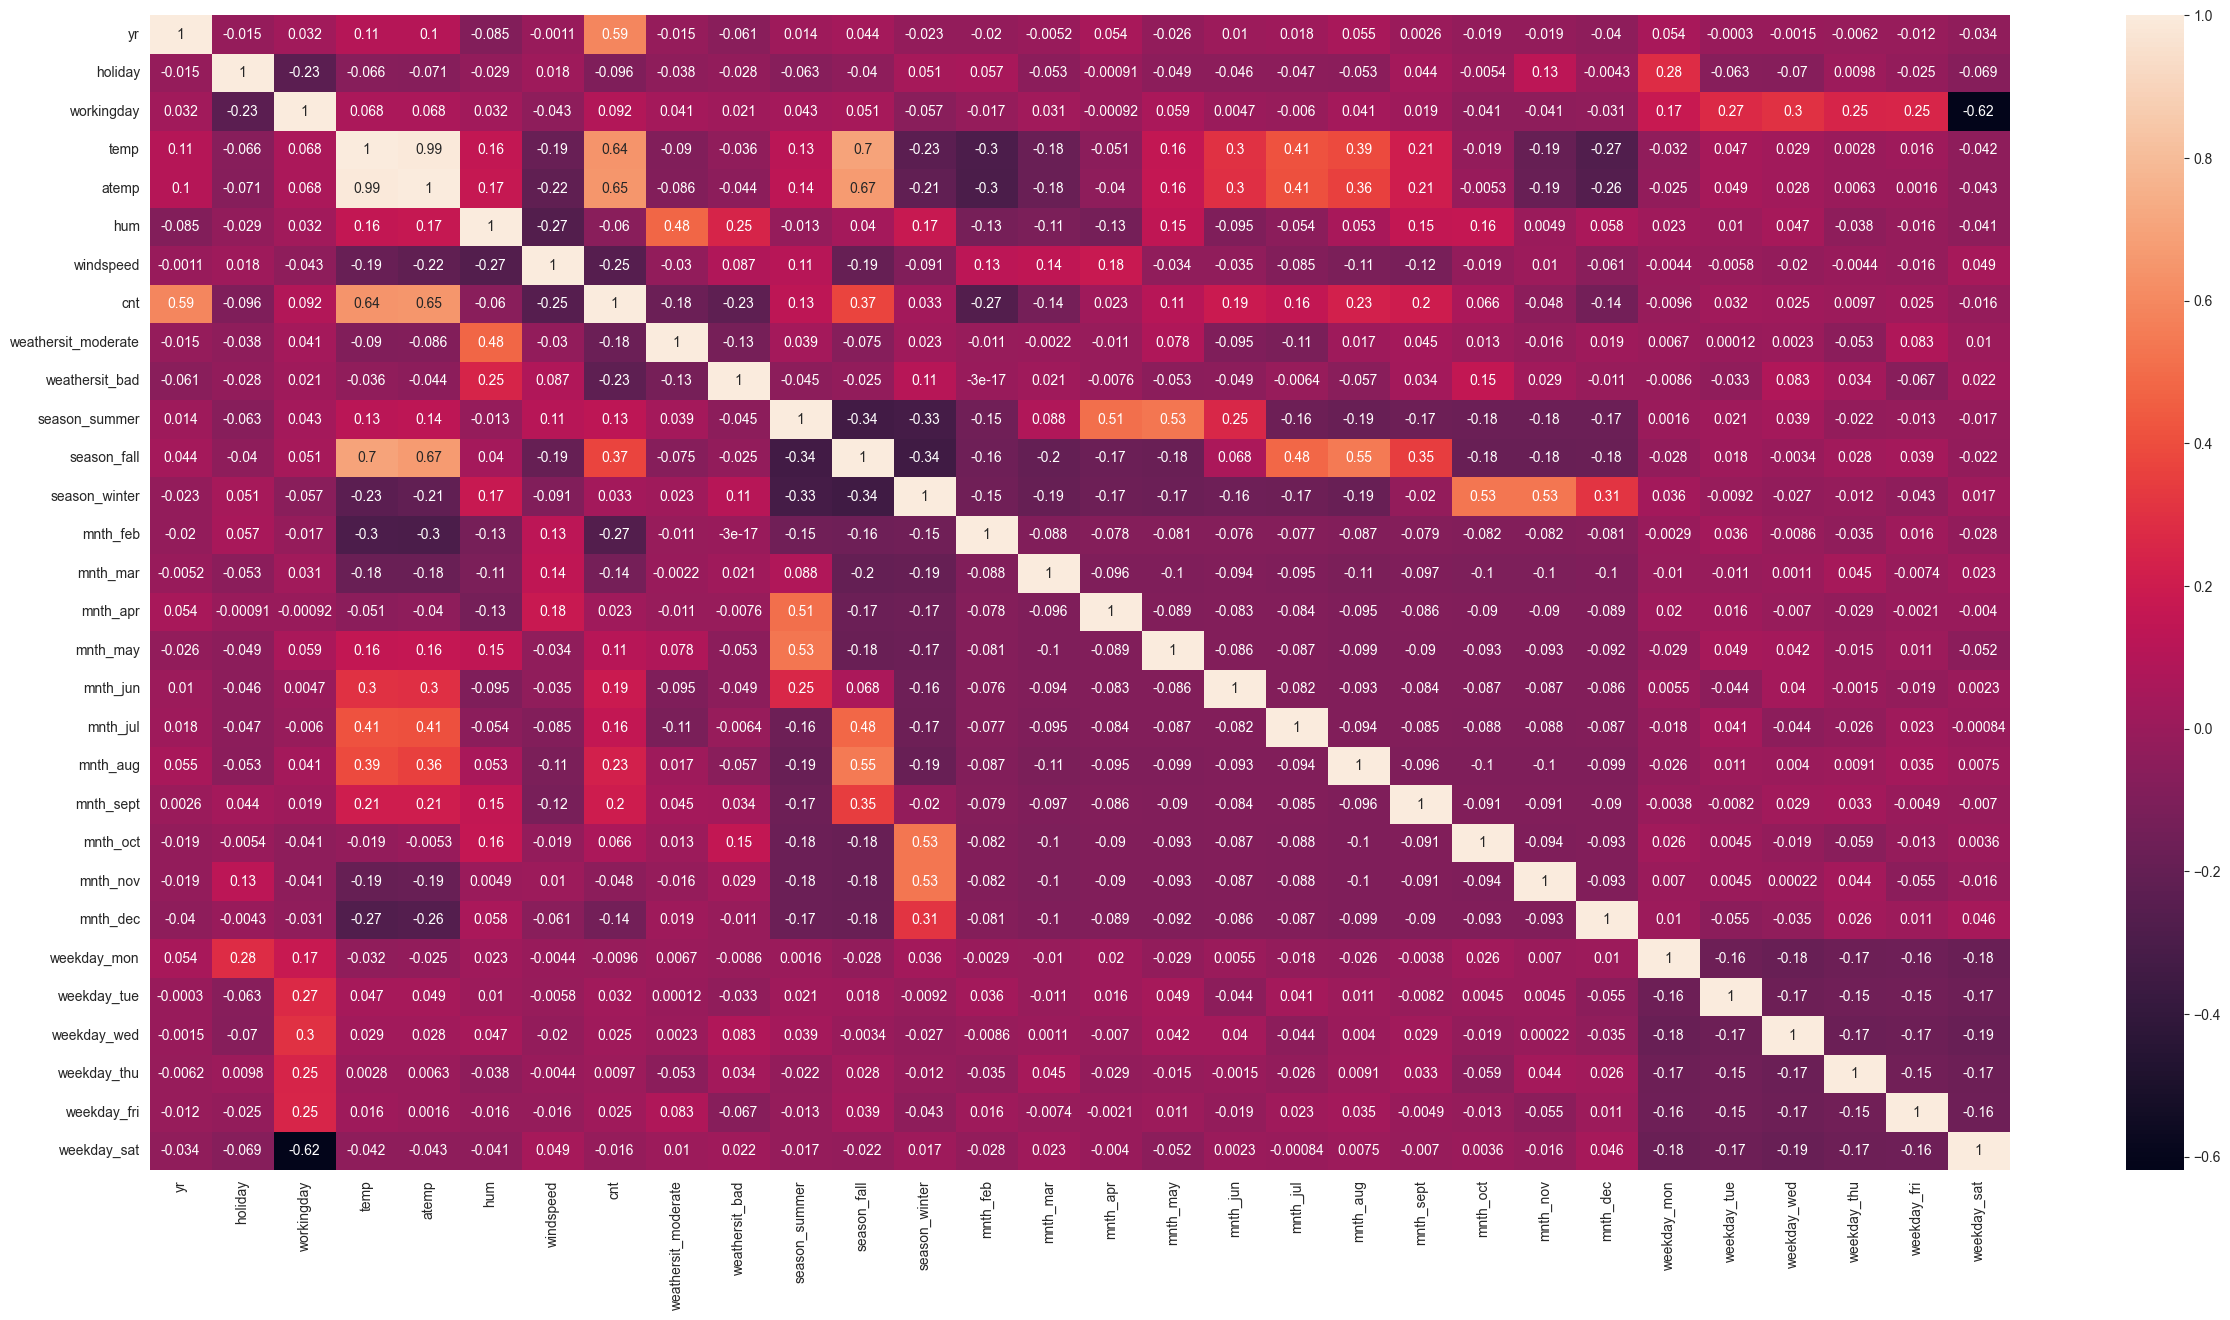

In [497]:
plt.figure(figsize=(30,15))
sns.heatmap(df_train.corr(numeric_only=True),annot=True)

Out of 34 Columns we have, cnt is the Dependednt Column and rest all 33 are Independent columns.
As the number of columns are high, I would rather start with RFE and based on need i shall add or remove columns manually 

In [498]:
y_train=df_train.pop('cnt')
X_train=df_train
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,weathersit_moderate,weathersit_bad,season_summer,...,mnth_sept,mnth_oct,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,...,0,1,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.762183,0.605840,0.355596,1,0,1,...,0,0,0,0,1,0,0,0,0,0
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0,0,0,...,0,0,0,0,0,0,0,1,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0,0,0,...,0,0,0,0,0,0,1,0,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,1,0,0,...,0,0,0,1,0,0,0,0,0,1


## Building the First Model

## BASE Model - With all the features

In [499]:
X_train.shape

(510, 29)

In [500]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lbase = sm.OLS(y_train, X_train_lm).fit()
lbase.params

const                  0.175618
yr                     0.232208
holiday               -0.042394
workingday             0.043879
temp                   0.401322
atemp                  0.050628
hum                   -0.151812
windspeed             -0.184388
weathersit_moderate   -0.061030
weathersit_bad        -0.256697
season_summer          0.086796
season_fall            0.048580
season_winter          0.153968
mnth_feb               0.030389
mnth_mar               0.063853
mnth_apr               0.062565
mnth_may               0.087257
mnth_jun               0.060862
mnth_jul               0.023289
mnth_aug               0.078641
mnth_sept              0.144371
mnth_oct               0.070260
mnth_nov               0.020783
mnth_dec               0.016994
weekday_mon           -0.009946
weekday_tue           -0.007753
weekday_wed            0.005823
weekday_thu            0.001806
weekday_fri            0.011556
weekday_sat            0.054533
dtype: float64

In [501]:
from sklearn.linear_model import LinearRegression
# Instantiate
lmbase = LinearRegression()
# Fit a line
lmbase.fit(X_train, y_train)

LinearRegression()

Print the coefficients and intercept

In [502]:
print(lmbase.coef_)
print(lmbase.intercept_)

[ 0.2322076  -0.04239358  0.04387922  0.40132173  0.05062751 -0.15181212
 -0.18438787 -0.06103021 -0.25669709  0.08679582  0.04858014  0.15396753
  0.03038946  0.06385346  0.06256549  0.08725656  0.06086195  0.02328882
  0.0786415   0.14437123  0.07026041  0.02078279  0.0169937  -0.00994627
 -0.00775255  0.00582292  0.00180587  0.01155568  0.05453262]
0.1756176506682115


Getting the model summary

In [503]:
lbase.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          8.42e-181
Time:                        17:20:15   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1756      0.030      5.777      0.000       0.116       0.235
yr                      0.2322      0.008     28.792      0.000       0.216       0.248
holiday                -0.0424      0.024     -1.793      0.074      -0.089       0.004
workingday              0.0439      0.009      4.689      0.000       0.025       0.062
temp                    0.4013      0.142      2.821      0.005       0.122       0.681
atemp                   0.0506      0.138      0.366      0.714      -0.221       0.322
hum                    -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed              -0.1844      0.026     -7.003      0.000      -0.236      -0.133
weathersit_moderate    -0.0610      0.010     -5.845      0.000      -0.082      -0.041
weathersit_bad         -0.2567      0.026     -9.712      0.000      -0.309      -0.205
season_summer           0.0868      0.024      3.679      0.000       0.040       0.133
season_fall             0.0486      0.030      1.618      0.106      -0.010       0.108
season_winter           0.1540      0.026      5.932      0.000       0.103       0.205
mnth_feb                0.0304      0.021      1.474      0.141      -0.010       0.071
mnth_mar                0.0639      0.022      2.857      0.004       0.020       0.108
mnth_apr                0.0626      0.034      1.864      0.063      -0.003       0.129
mnth_may                0.0873      0.036      2.412      0.016       0.016       0.158
mnth_jun                0.0609      0.039      1.556      0.120      -0.016       0.138
mnth_jul                0.0233      0.044      0.529      0.597      -0.063       0.110
mnth_aug                0.0786      0.042      1.873      0.062      -0.004       0.161
mnth_sept               0.1444      0.037      3.853      0.000       0.071       0.218
mnth_oct                0.0703      0.034      2.041      0.042       0.003       0.138
mnth_nov                0.0208      0.033      0.633      0.527      -0.044       0.085
mnth_dec                0.0170      0.027      0.641      0.522      -0.035       0.069
weekday_mon            -0.0099      0.010     -1.023      0.307      -0.029       0.009
weekday_tue            -0.0078      0.011     -0.695      0.488      -0.030       0.014
weekday_wed             0.0058      0.011      0.554      0.580      -0.015       0.026
weekday_thu             0.0018      0.011      0.165      0.869      -0.020       0.023
weekday_fri             0.0116      0.011      1.031      0.303      -0.010       0.034
weekday_sat             0.0545      0.015      3.757      0.000       0.026       0.083
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):       

We can start dropping the features based on P-value, It takes so many manual iteration.

We are using RFE method to avoiod these Multiple Manul Itrations and allowing the system to choose meaning Features to start the model building

## MODEL 2 - Using RFE

In [504]:
# Import RFE
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

# RFE with 15 features
lm2 = LinearRegression()
estimator = SVR(kernel="linear")
rfe = RFE(estimator, n_features_to_select=15, step=1)

# Fit with 15 features
rfe.fit(X_train, y_train)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 



[ True False  True  True  True  True  True  True  True  True  True  True
 False False False False False False  True  True  True False False False
 False False False False  True]
[ 1 13  1  1  1  1  1  1  1  1  1  1  6  2  3  4  5  7  1  1  1  8  9 15
 10 14 11 12  1]


In [505]:
X_train.shape

(510, 29)

In [506]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 13),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weathersit_moderate', True, 1),
 ('weathersit_bad', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_feb', False, 6),
 ('mnth_mar', False, 2),
 ('mnth_apr', False, 3),
 ('mnth_may', False, 4),
 ('mnth_jun', False, 5),
 ('mnth_jul', False, 7),
 ('mnth_aug', True, 1),
 ('mnth_sept', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_nov', False, 8),
 ('mnth_dec', False, 9),
 ('weekday_mon', False, 15),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 14),
 ('weekday_thu', False, 11),
 ('weekday_fri', False, 12),
 ('weekday_sat', True, 1)]

In [507]:
X_train.columns[~rfe.support_]

Index(['holiday', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun',
       'mnth_jul', 'mnth_nov', 'mnth_dec', 'weekday_mon', 'weekday_tue',
       'weekday_wed', 'weekday_thu', 'weekday_fri'],
      dtype='object')

In [508]:
### Building model using statsmodel, for the detailed statistics
col1 = X_train.columns[rfe.support_]

# Subsetting training data for 15 selected columns
X_train_Model2 = X_train[col1]



In [509]:
# Add a constant to the model
X_train_Model2 = sm.add_constant(X_train_Model2)
X_train_Model2.head()

# Fitting the model with 15 variables
lm2 = sm.OLS(y_train, X_train_Model2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.0
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          1.40e-190
Time:                        17:20:18   Log-Likelihood:                 518.01
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     494   BIC:                            -936.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1851    

In [510]:
X=X_train_Model2.drop('const',axis=1)

In [511]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,391.08
3,atemp,369.29
4,hum,17.31
9,season_fall,8.22
1,workingday,4.56
5,windspeed,3.99
8,season_summer,3.43
10,season_winter,2.88
6,weathersit_moderate,2.14
0,yr,2.04


Drop the column atemp as its VIF is very High and p-value is also 0.963 , temp and atemp have multicorenaritly


## Model 3

In [512]:
X_train_Model3 = X_train_Model2.drop(['atemp','const'],axis=1)

In [513]:
X_train_Model3.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'weathersit_moderate',
       'weathersit_bad', 'season_summer', 'season_fall', 'season_winter',
       'mnth_aug', 'mnth_sept', 'mnth_oct', 'weekday_sat'],
      dtype='object')

In [514]:
# Add a constant to the model
X_train_Model3 = sm.add_constant(X_train_Model3)
# Fitting the model with 14 variables - Excluding atemp
lm3 = sm.OLS(y_train,X_train_Model3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          1.02e-191
Time:                        17:20:20   Log-Likelihood:                 517.97
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1855    

In [515]:
X=X_train_Model3.drop('const',axis=1)

In [516]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.04
3,hum,17.01
8,season_fall,8.17
1,workingday,4.55
4,windspeed,3.83
7,season_summer,3.43
9,season_winter,2.88
5,weathersit_moderate,2.14
0,yr,2.04
10,mnth_aug,1.85


Drop the column seaoson_fall as its P-value is very High  

## Model 4

In [517]:
X_train_Model4=X_train_Model3.drop('season_fall',axis=1)

In [518]:
# Add a constant to the model
X_train_Model4 = sm.add_constant(X_train_Model4)
# Fitting the model with 13 variables - Excluding atemp
lm4 = sm.OLS(y_train, X_train_Model4).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.9
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          1.86e-192
Time:                        17:20:21   Log-Likelihood:                 516.94
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -946.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1848    

In [519]:
X=X_train_Model4.drop('const',axis=1)

In [520]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.09
2,temp,10.01
1,workingday,4.55
4,windspeed,3.76
8,season_winter,2.27
5,weathersit_moderate,2.13
0,yr,2.03
7,season_summer,1.82
12,weekday_sat,1.79
11,mnth_oct,1.61


Drop the column hum as its VIF is  High  

## Model 5

In [521]:
X_train_Model5 = X_train_Model4.drop('hum',axis=1)

In [522]:
X_train_Model5.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'weathersit_moderate',
       'weathersit_bad', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_sept', 'mnth_oct', 'weekday_sat'],
      dtype='object')

In [523]:
# Add a constant to the model
X_train_Model5 = sm.add_constant(X_train_Model5)
# Fitting the model with 14 variables - Excluding atemp
lm5 = sm.OLS(y_train, X_train_Model5).fit()   
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          2.86e-189
Time:                        17:20:23   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0856    

In [524]:
X_train_Model5.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'weathersit_moderate',
       'weathersit_bad', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_sept', 'mnth_oct', 'weekday_sat'],
      dtype='object')

In [525]:
X=X_train_Model5.drop('const',axis=1)

In [526]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.26
1,workingday,4.07
3,windspeed,3.49
0,yr,2.02
7,season_winter,1.99
6,season_summer,1.82
11,weekday_sat,1.70
10,mnth_oct,1.61
8,mnth_aug,1.59
4,weathersit_moderate,1.54


Drop the Temp Feature as its VIF is pretty High

## Model 6

In [527]:
X_train_Model6 = X_train_Model5.drop('temp',axis=1)

In [528]:
X_train_Model6.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'weathersit_moderate',
       'weathersit_bad', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_sept', 'mnth_oct', 'weekday_sat'],
      dtype='object')

In [529]:
X_train_Model6=X_train_Model4.drop('const',axis=1)

In [530]:
# Add a constant to the model
X_train_Model6 = sm.add_constant(X_train_Model6)
# Fitting the model with 14 variables - Excluding atemp
lm6 = sm.OLS(y_train,X_train_Model6).fit()   
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.9
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          1.86e-192
Time:                        17:20:25   Log-Likelihood:                 516.94
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -946.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1848    

In [531]:
X_train_Model6.drop('const',axis=1,inplace=True)

In [532]:
X=X_train_Model6

In [533]:
# Calculate the VIFs for the Model4
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.09
2,temp,10.01
1,workingday,4.55
4,windspeed,3.76
8,season_winter,2.27
5,weathersit_moderate,2.13
0,yr,2.03
7,season_summer,1.82
12,weekday_sat,1.79
11,mnth_oct,1.61


if i drop temp based on VIF value, the ovrall model Adjusted r square will be reduced to 66% from the 84%. We shall not use this Model 6.

temp is important factor in this model building

We shall use the Model5 as the better model discarding this Model6

In [534]:
X_train_Model5.drop('const',axis=1,inplace=True)

In [535]:
X_train_Model5.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'weathersit_moderate',
       'weathersit_bad', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_sept', 'mnth_oct', 'weekday_sat'],
      dtype='object')

Let us draw a heatmap and understand the correlation between the Features
If 2 features are positively correlated, We can dropone and keep the other

<Axes: >

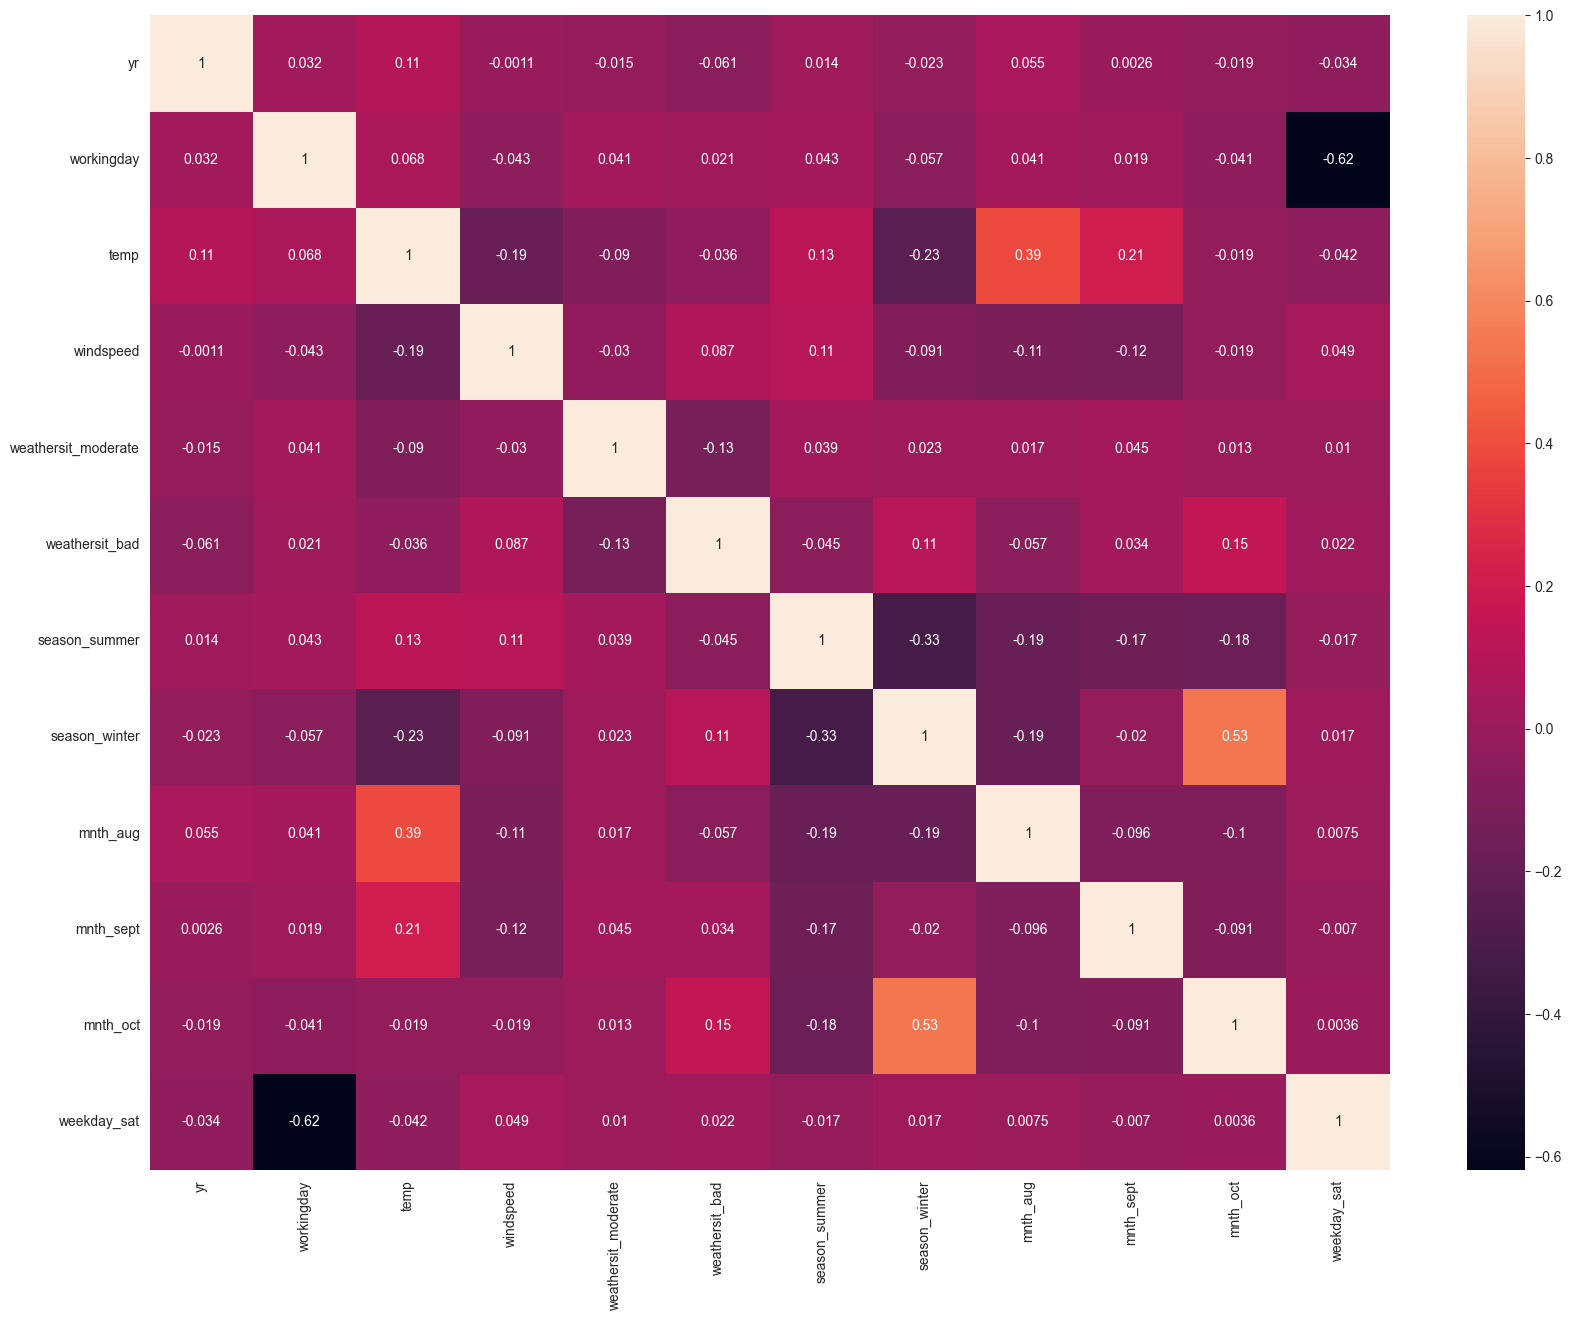

In [536]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train_Model5.corr(),annot=True)

We will add back the Temp feature as its one of the  most relevant Feature in model building process

Since Month_oct and Season_Winter are highly correlatedl We decided to keep season_winter and drop mnth_oct

## Model 7

Dropiing the column mnth_oct

In [537]:
X_train_Model7=X_train_Model5.drop('mnth_oct',axis=1)

In [538]:
# Add a constant to the model
X_train_Model7 = sm.add_constant(X_train_Model7)
# Fitting the model with 14 variables - Excluding atemp
lm7 = sm.OLS(y_train,X_train_Model7).fit()   
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          2.00e-189
Time:                        17:20:39   Log-Likelihood:                 504.10
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     498   BIC:                            -933.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0813    

In [539]:
X_train_Model7.drop('const',axis=1,inplace=True)

In [540]:
X=X_train_Model7

In [541]:
# Calculate the VIFs for the Model4
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
6,season_summer,1.81
10,weekday_sat,1.69
8,mnth_aug,1.58
4,weathersit_moderate,1.54
7,season_winter,1.51
9,mnth_sept,1.30


## Model 8

Since Temp and mnth_aug are highly correlated We decided to keep temp and drop mnth_aug

Dropping the column mnth_aug

In [542]:
X_train_Model8=X_train_Model7.drop('mnth_aug',axis=1)

In [543]:
# Add a constant to the model
X_train_Model8 = sm.add_constant(X_train_Model8)
# Fitting the model with 14 variables - Excluding atemp
lm8 = sm.OLS(y_train,X_train_Model8).fit()   
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          1.47e-188
Time:                        17:20:45   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0753    

In [544]:
X_train_Model8.drop('const',axis=1,inplace=True)

In [545]:
X=X_train_Model8

In [546]:
# Calculate the VIFs for the Model4
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
9,weekday_sat,1.69
6,season_summer,1.57
4,weathersit_moderate,1.53
7,season_winter,1.40
8,mnth_sept,1.20
5,weathersit_bad,1.08


<Axes: >

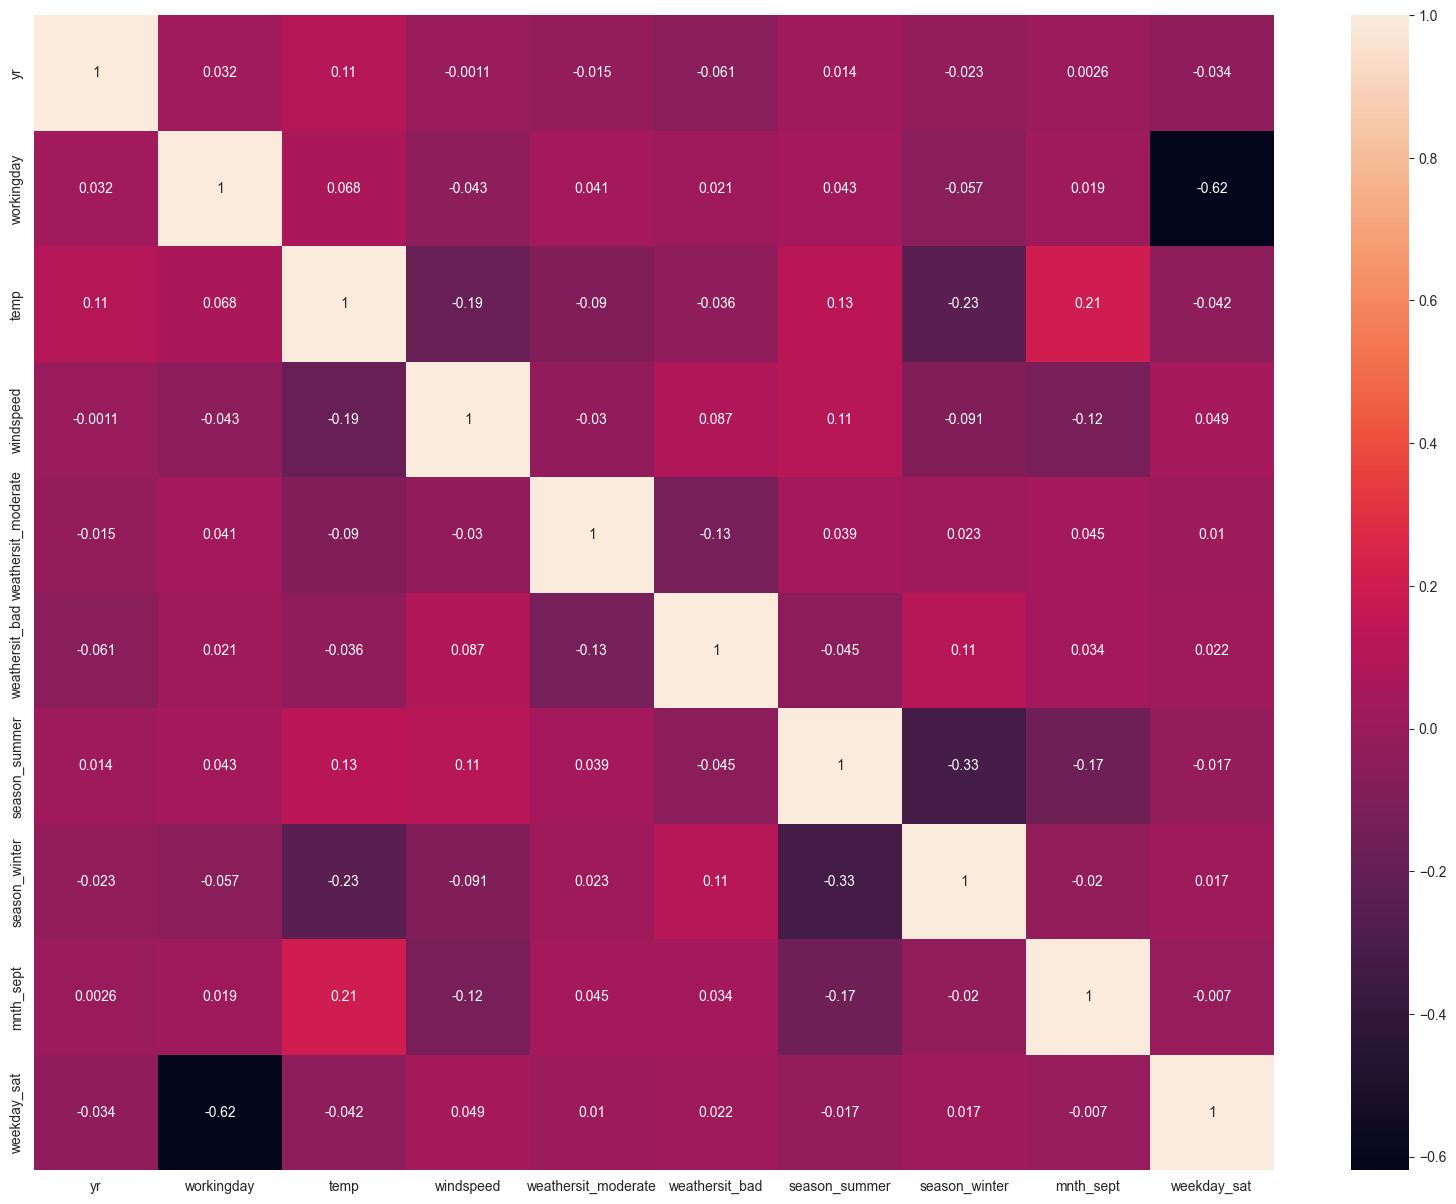

In [547]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train_Model8.corr(),annot=True)

## Model 8 is rhe Ideal Model, 
## All the p-value are under control, and VIF are less than 5 for all the Features,
## This should be the best Fit , We don't have any extra features which are correlated to each other.

In [548]:
y_train.shape

(510,)

In [549]:
X_train_Model8 = sm.add_constant(X_train_Model8)
X_train_Model8.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'weathersit_moderate',
       'weathersit_bad', 'season_summer', 'season_winter', 'mnth_sept',
       'weekday_sat'],
      dtype='object')

Plot the histogram of the error terms

In [550]:
y_train_pred = lm8.predict ( X_train_Model8)

Text(0.5, 0, 'Errors')

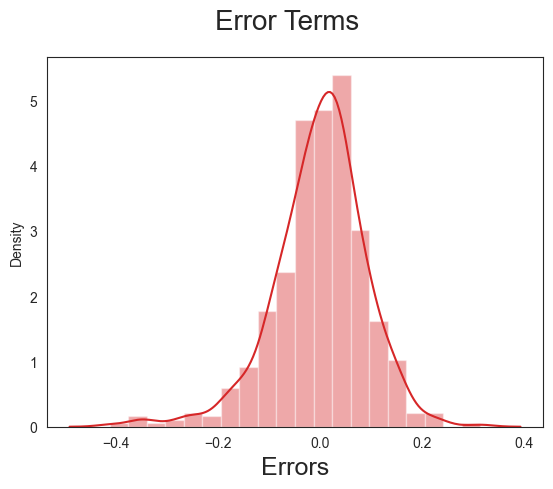

In [551]:
res=y_train-y_train_pred
fig = plt.figure()
sns.distplot((res), bins = 20,color="tab:red")
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Actual vs Predicted

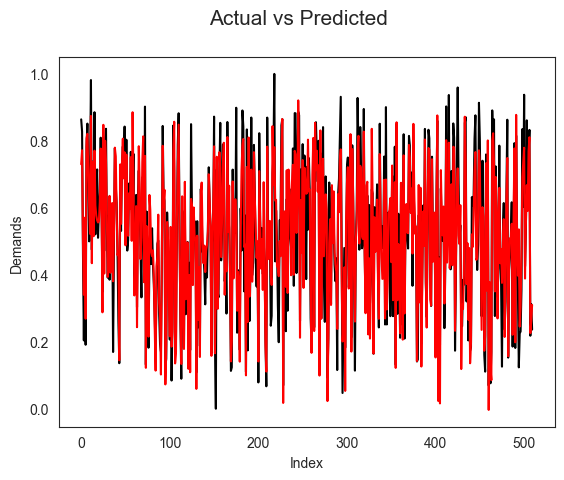

In [552]:
c = [i for i in range(0,len(X_train_Model7),1)]
plt.plot(c,y_train, color="black")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Error Terms

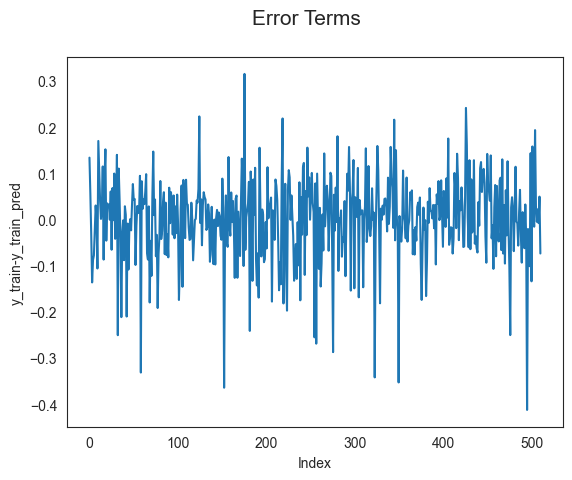

In [553]:
c = [i for i in range(0,len(X_train_Model7),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Print R-squared Value for the train dataset

In [554]:
R2_score_train=r2_score(y_train,y_train_pred)
print(R2_score_train)

0.8357769866151917


scatter plot for the check y_train vs Redisual

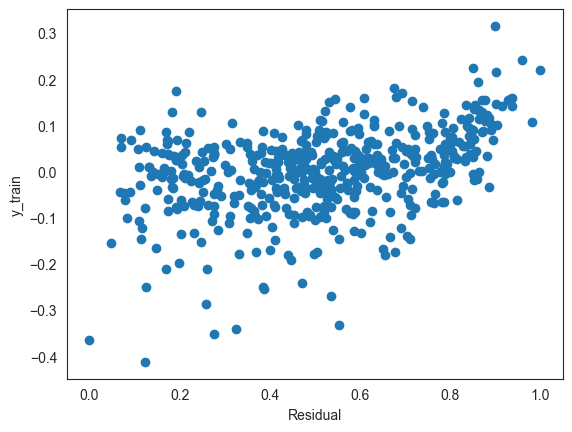

In [555]:
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

Important metrics  related to the Model behaviour on Train dataset

In [556]:
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_train,y_train_pred),4))
print('MSE:', round(metrics.mean_squared_error(y_train,y_train_pred),4))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))))

MAE: 0.0673
MSE: 0.0083
RMSE: 0


Test Data set

Dividing into X_test and y_test

In [557]:
y_test=df_test.pop('cnt')
X_test=df_test

In [558]:
print(X_test.shape)
print(y_test.shape)

(219, 29)
(219,)


In [559]:
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,weathersit_moderate,weathersit_bad,season_summer,...,mnth_sept,mnth_oct,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat
184,0,1,0,0.831783,0.769660,0.657364,0.084219,1,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,1,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,1,0,0,...,0,1,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.257562,0.243430,0.708888,0.287411,1,0,0,...,0,0,0,0,0,0,0,0,0,0
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0,0,0,...,0,0,0,1,0,1,0,0,0,0
127,0,0,0,0.584649,0.577380,0.650923,0.069510,0,0,1,...,0,0,0,0,0,0,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [560]:
X_train_Model8

,const,yr,workingday,temp,windspeed,weathersit_moderate,weathersit_bad,season_summer,season_winter,mnth_sept,weekday_sat
653,1.0,1,1,0.509887,0.300794,0,0,0,1,0,0
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,1,0.824514,0.355596,1,0,1,0,0,0
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,1,0,0,1,0,1


In [561]:
X_train_Model8=X_train_Model8.drop('const',axis=1)

Now let's use our model to make predictions.

In [562]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_Model8.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [563]:
y_test_pred = lm8.predict(X_test_new)

Plotting y_test and y_pred to understand the spread.

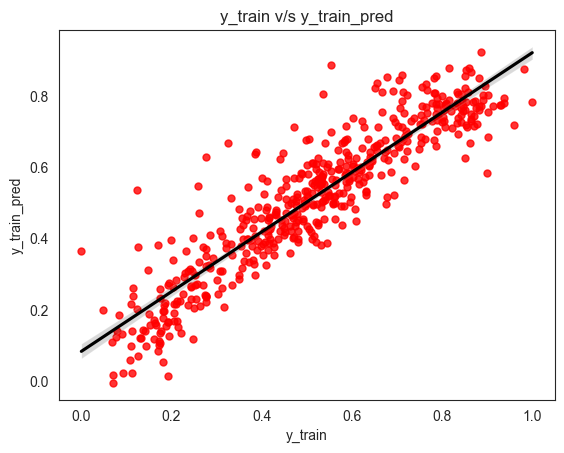

In [564]:
# Visualize the trained model using a scatter plot with a linear regression fit line
sns.regplot(x = y_train, y = y_train_pred, line_kws = { 'color': 'black' }, scatter_kws = { 's' : 25, 'color': 'red' })
# Show the plot
plt.title('y_train v/s y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred') 
plt.show()

R2 score for the test dataset

In [565]:
R2_score_test=r2_score(y_test,y_test_pred)
print(R2_score_test)

0.7955844377237249


scatter plot for the check y_test vs Residual

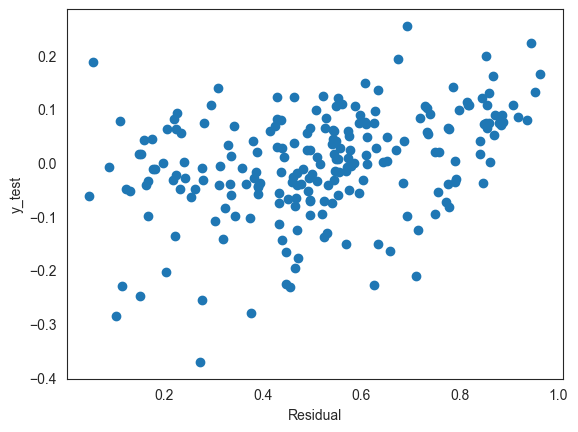

In [566]:
residual = (y_test - y_test_pred)
plt.scatter(y_test,residual)
plt.ylabel("y_test")
plt.xlabel("Residual")
plt.show()

Actual vs Predicted

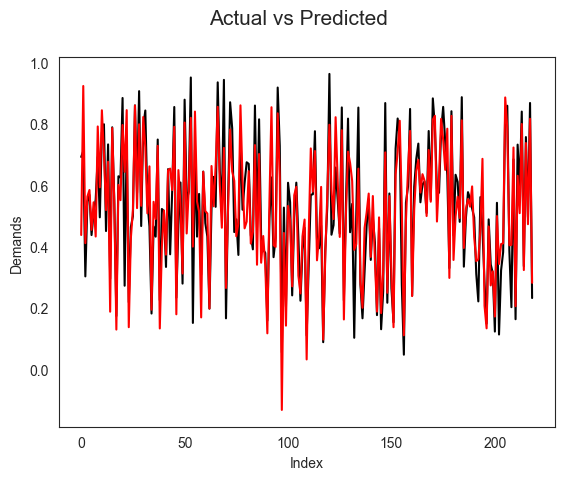

In [567]:
c = [i for i in range(0,len(X_test_new),1)]
plt.plot(c,y_test, color="black")
plt.plot(c,y_test_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Error Terms

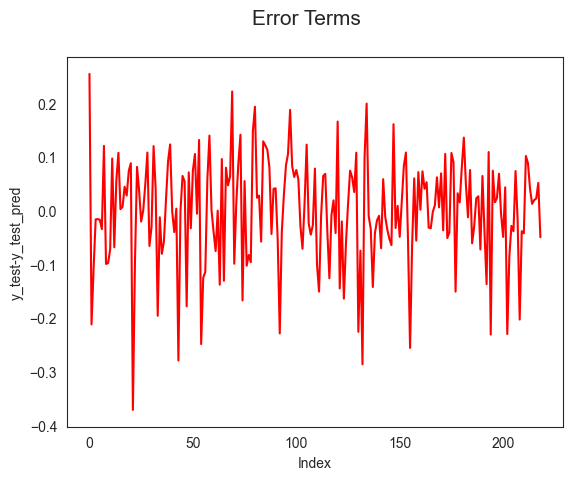

In [568]:
c = [i for i in range(0,len(X_test_new),1)]
plt.plot(c,y_test-y_test_pred,color="red")
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_test-y_test_pred')
plt.show()

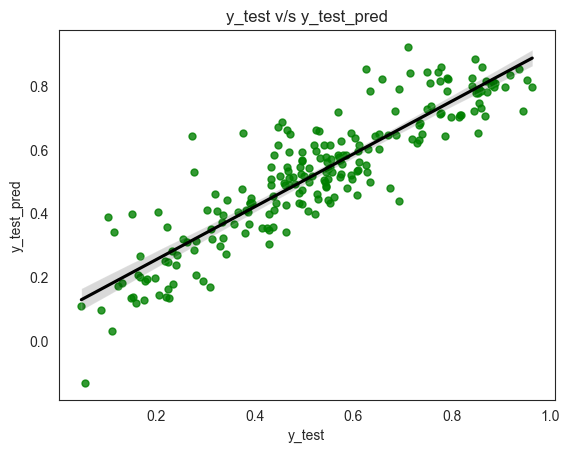

In [569]:
# Visualize the trained model using a scatter plot with a linear regression fit line
sns.regplot(x = y_test, y = y_test_pred, line_kws = { 'color': 'black' }, scatter_kws = { 's' : 25, 'color': 'green' })
# Show the plot
plt.title('y_test v/s y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 
plt.show()

Error terms Bias

In [570]:
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="red", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

Plot error terms for test data

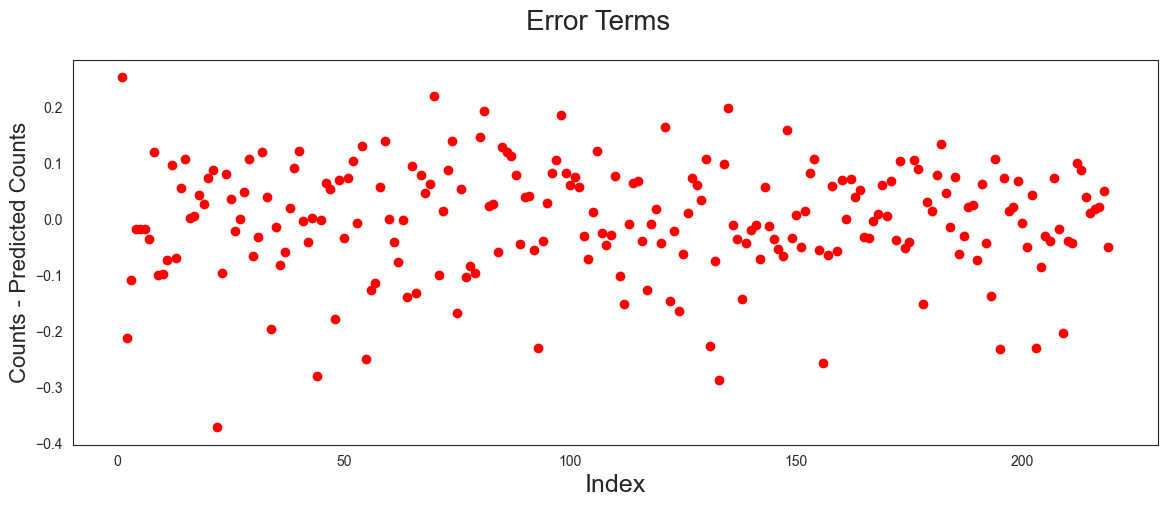

In [571]:
plot_err_terms(y_test,y_test_pred)

Final List of columns of the Model

In [572]:
X_test_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'weathersit_moderate',
       'weathersit_bad', 'season_summer', 'season_winter', 'mnth_sept',
       'weekday_sat'],
      dtype='object')

R2 of train Data set and R2 of the test Data set

In [573]:
print("Train:",round(R2_score_train,4),"Test:",round(R2_score_test,4))

Train: 0.8358 Test: 0.7956


In [574]:
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          1.47e-188
Time:                        17:22:31   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0753    

In [575]:
# Important metrics  related to the Model behaviour
from sklearn import metrics

print('MAE:', round(metrics.mean_absolute_error(y_test, y_test_pred),4))
print('MSE:', round(metrics.mean_squared_error(y_test,  y_test_pred),4))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test,  y_test_pred))))

MAE: 0.076
MSE: 0.0097
RMSE: 0


In [576]:
## Q - Q Plot

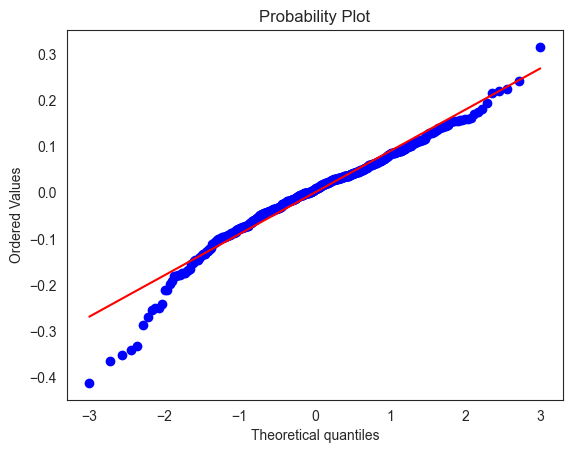

In [577]:
stats.probplot(y_train-y_train_pred, plot=plt)
plt.show()

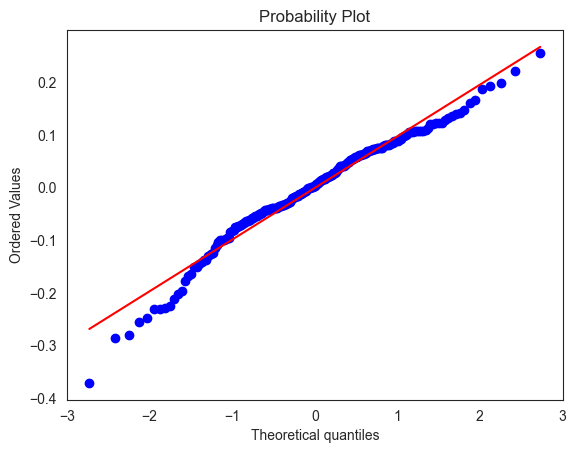

In [578]:
stats.probplot(y_test-y_test_pred, plot=plt)
plt.show()

Text(0, 0.5, 'Actuals')

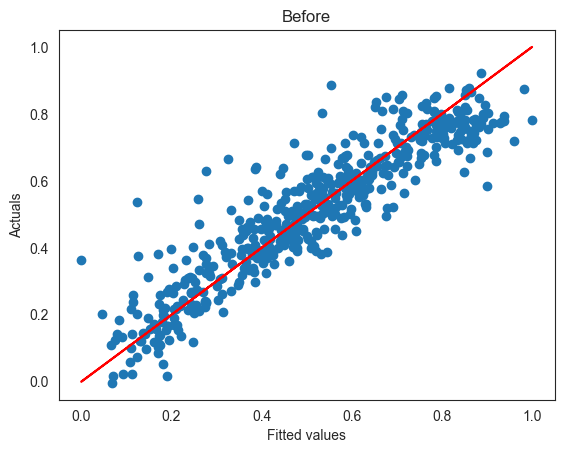

In [579]:
plt.title("Before")
plt.plot(y_train,y_train, color="red")
plt.scatter(y_train, y_train_pred)
plt.xlabel("Fitted values")
plt.ylabel("Actuals")

Text(0, 0.5, 'Actuals')

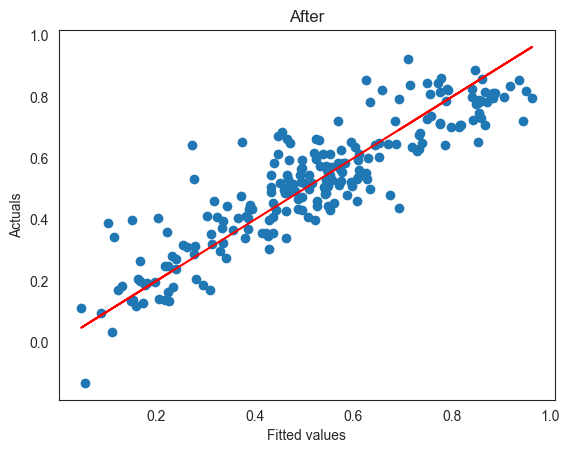

In [580]:
plt.title("After")
plt.plot(y_test,y_test, color="red")
plt.scatter(y_test, y_test_pred)
plt.xlabel("Fitted values")
plt.ylabel("Actuals")

Conlcusion

cnt = (0.0753) + (yr * 0.2331) + (workingday * 0.0563) + (temp * 0.5499) - (windspeed * 0.1552) - (weathersit_Mist_cloudy * 0.0813) -(weathersit_Light_Snow * 0.2880) + (season_summer * 0.0874) + (season_winter * 0.1318) + (mnth_sept * 0.0972) + (weekday_sat * 0.0677)

Interepretation of results

Analysing the above model, the comapany should focus on the following features:
1. The Bike renting buiness had more business comapred to 2018, The business seems to be solving the Major commute problem for the people
1. Company should focus on expanding business during Summer and Winter.
2. Company should focus on expanding business during September.Lead to more profit.
3. Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
4. There would be less bookings during Light Snow or Rain, they could probably use this time to servicee the bikes without having business impac and make changes any infra relatec changes.
5. Company makes more business during the weekdays than the weekends or Holiday ,Company can put up some offeres during weekends and holidays to increase the sales.  
6. Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.


Recommendations

1. Leverage High-Impact Features: Focus on features such as temp, yr, and Winter as they exhibit the highest coefficient values, indicating significant impact on bike demand.
2. Seasonal Strategies: Develop targeted marketing and pricing strategies for different seasons, particularly emphasizing promotions during Summer and Winter.
3. Optimize Operational Planning: Adjust bike availability and distribution based on the significant features identified, optimizing resources for peak demand periods.
4. Weather-Sensitive Promotions: Implement weather-specific promotions or incentives to encourage bike usage during favorable weather conditions, addressing the impact of temp, hum, and windspeed.
5. New Market Insights: Use the developed model to gain insights into demand dynamics in the American market, informing business strategies and positioning BoomBikes competitively.
6. Continuous Monitoring and Adaptation: Regularly update the model with new data and adapt strategies based on evolving market conditions to ensure sustained revenue growth.